In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

In [ ]:
Startups = pd.read_csv("/content/50_Startups.csv")

In [ ]:
Startups.head()

,RandDSpend,Administration,MarketingSpend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [ ]:
Startups.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   RandDSpend      50 non-null     float64
 1   Administration  50 non-null     float64
 2   MarketingSpend  50 non-null     float64
 3   State           50 non-null     object 
 4   Profit          50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [ ]:
Startups.isna().sum()

RandDSpend        0
Administration    0
MarketingSpend    0
State             0
Profit            0
dtype: int64

In [ ]:
Startups.corr()

,RandDSpend,Administration,MarketingSpend,Profit
RandDSpend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
MarketingSpend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


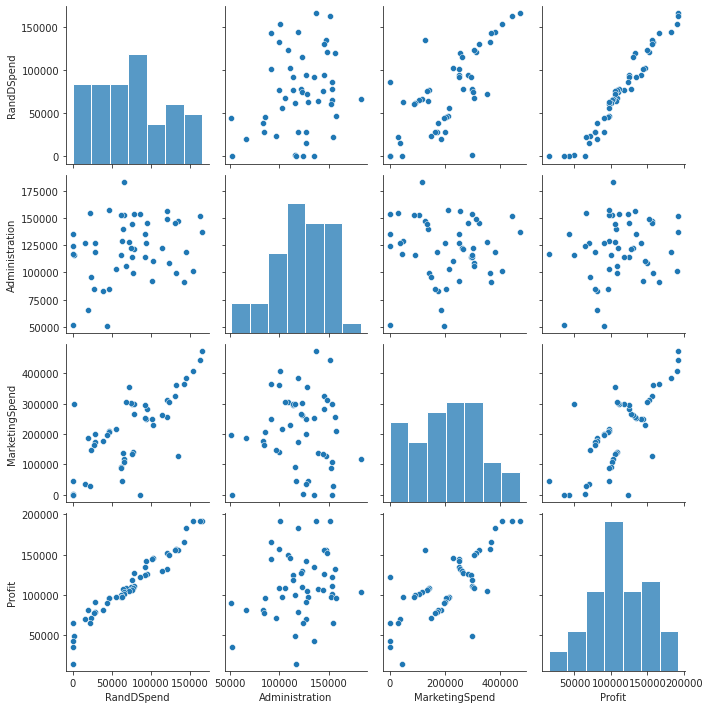

In [ ]:
sns.set_style(style='ticks')
sns.pairplot(Startups)

In [ ]:
import statsmodels.formula.api as smf 
model = smf.ols('RandDSpend~Administration+MarketingSpend+Profit',data=Startups).fit()

In [ ]:
model.params

Intercept        -59040.495616
Administration        0.083980
MarketingSpend        0.005184
Profit                1.084499
dtype: float64

In [ ]:
print(model.tvalues, '\n', model.pvalues)

Intercept         -7.898458
Administration     1.446083
MarketingSpend     0.264055
Profit            17.846374
dtype: float64 
 Intercept         4.176203e-10
Administration    1.549335e-01
MarketingSpend    7.929167e-01
Profit            2.634968e-22
dtype: float64


In [ ]:
(model.rsquared,model.rsquared_adj)

(0.9488830971212534, 0.9455493860639439)

In [ ]:
ml_v=smf.ols('RandDSpend~MarketingSpend',data = Startups).fit() 
print(ml_v.tvalues, '\n', ml_v.pvalues)   

Intercept         1.799453
MarketingSpend    7.276942
dtype: float64 
 Intercept         7.823470e-02
MarketingSpend    2.769808e-09
dtype: float64


In [ ]:
ml_w=smf.ols('RandDSpend~Administration',data = Startups).fit()  
print(ml_w.tvalues, '\n', ml_w.pvalues)  

Intercept         0.897073
Administration    1.727648
dtype: float64 
 Intercept         0.374157
Administration    0.090481
dtype: float64


In [ ]:
ml_wv=smf.ols('RandDSpend~MarketingSpend+Administration',data = Startups).fit()  
print(ml_wv.tvalues, '\n', ml_wv.pvalues)  

Intercept        -1.807194
MarketingSpend    7.889568
Administration    2.858702
dtype: float64 
 Intercept         7.713519e-02
MarketingSpend    3.724804e-10
Administration    6.322635e-03
dtype: float64


In [ ]:
rsq_marketingspend = smf.ols('MarketingSpend~Profit+Administration',data=Startups).fit().rsquared  
vif_marketingspend = 1/(1-rsq_marketingspend) # 4717.8

rsq_profit = smf.ols('Profit~MarketingSpend+Administration',data=Startups).fit().rsquared  
vif_profit = 1/(1-rsq_profit) # 1921.8

rsq_administration = smf.ols('Administration~Profit+MarketingSpend',data=Startups).fit().rsquared  
vif_administration = 1/(1-rsq_administration) #  136.8


# Storing vif values in a data frame
d1 = {'Variables':['MarketingSpend','Profit','Administration'],'VIF':[vif_marketingspend,vif_profit,vif_administration]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame

,Variables,VIF
0,MarketingSpend,2.461600
1,Profit,2.562283
2,Administration,1.130742


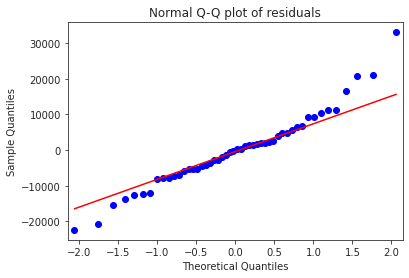

In [ ]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q') # line = 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [ ]:
list(np.where(model.resid>10))

[array([ 0,  4,  5,  6,  7,  8,  9, 14, 15, 17, 18, 21, 22, 24, 26, 27, 29,
        30, 31, 32, 37, 39, 47, 48, 49])]

In [ ]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

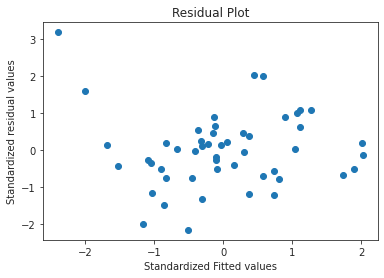

In [ ]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

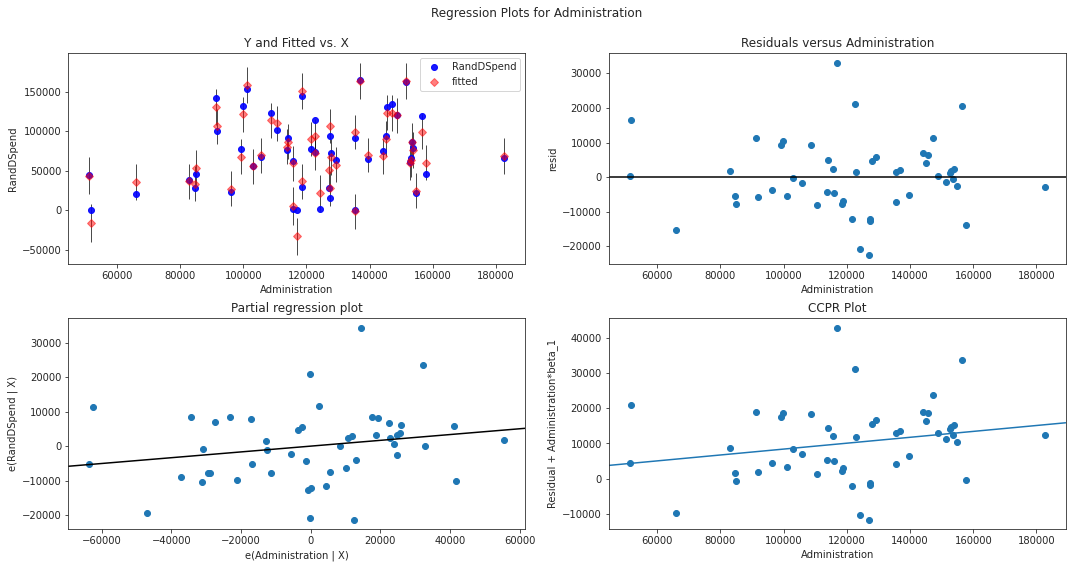

In [ ]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Administration", fig=fig)
plt.show()

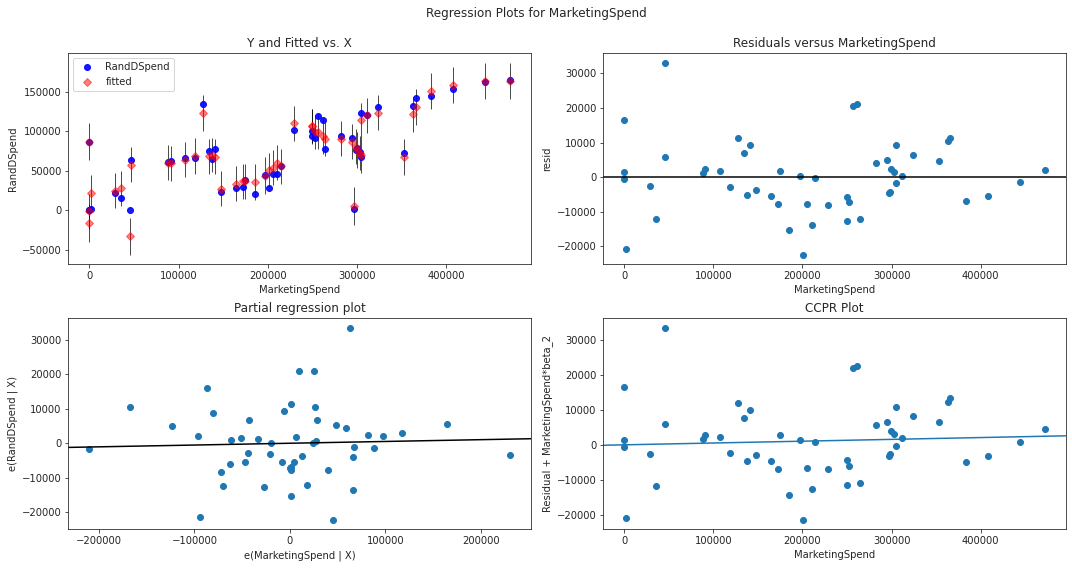

In [ ]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "MarketingSpend", fig=fig)
plt.show()

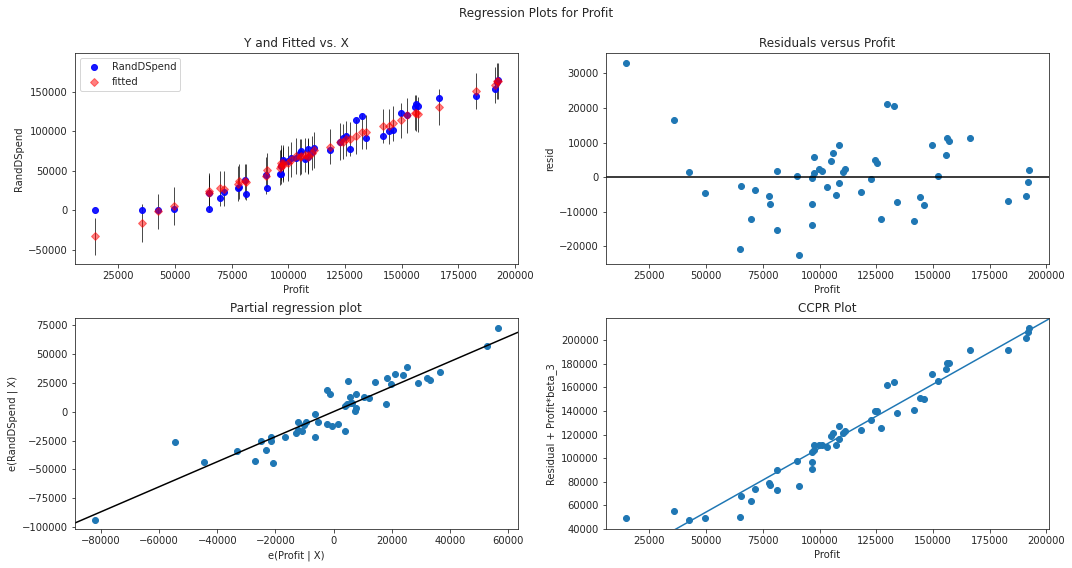

In [ ]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Profit", fig=fig)
plt.show()

In [ ]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


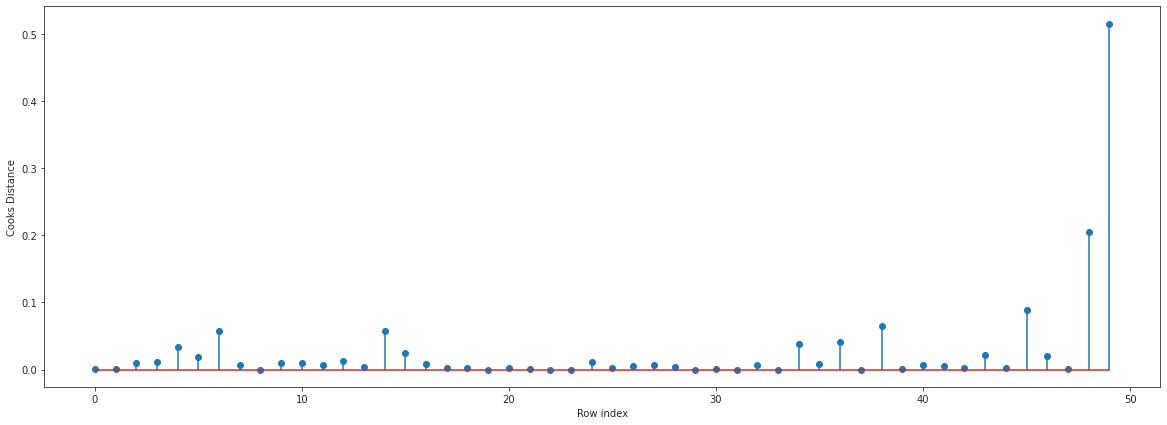

In [ ]:
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(Startups)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [ ]:
(np.argmax(c),np.max(c))

(49, 0.5146126758750665)

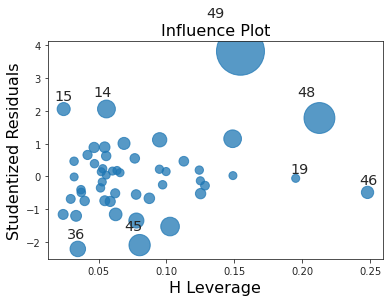

In [ ]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [ ]:
k = Startups.shape[1]
n = Startups.shape[0]
leverage_cutoff = 3*((k + 1)/n)

In [ ]:
leverage_cutoff

0.36

In [ ]:
Startups[Startups.index.isin([30, 45])]

,RandDSpend,Administration,MarketingSpend,State,Profit
30,61994.48,115641.28,91131.24,Florida,99937.59
45,1000.23,124153.04,1903.93,New York,64926.08


In [ ]:
Startups.head()

,RandDSpend,Administration,MarketingSpend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [ ]:
Startups_new = pd.read_csv("50_Startups.csv")

In [ ]:
Startups1=Startups_new.drop(Startups_new.index[[30,45]],axis=0).reset_index()

In [ ]:
Startups1=Startups1.drop(['index'],axis=1)

In [ ]:
Startups1

,RandDSpend,Administration,MarketingSpend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [ ]:
final_ml_V= smf.ols('RandDSpend~Administration+Profit+MarketingSpend',data = Startups1).fit()

In [ ]:
(final_ml_V.rsquared,final_ml_V.aic)

(0.9508006950724123, 1028.4633828144001)

In [ ]:
final_ml_W= smf.ols('RandDSpend~Administration+Profit+MarketingSpend',data = Startups1).fit()

In [ ]:
(final_ml_W.rsquared,final_ml_W.aic)

(0.9508006950724123, 1028.4633828144001)

In [ ]:
model_influence_V = final_ml_V.get_influence()
(c_V, _) = model_influence_V.cooks_distance

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


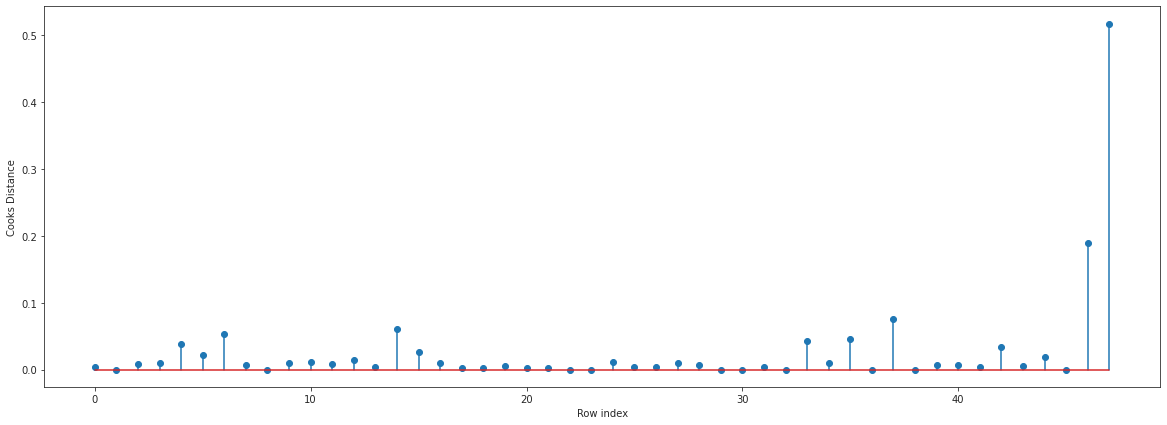

In [ ]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(Startups1)),np.round(c_V,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [ ]:
(np.argmax(c_V),np.max(c_V))

(47, 0.5166031887309658)

In [ ]:
Startups2=Startups1.drop(Startups1.index[[30,45]],axis=0)

In [ ]:
Startups2

,RandDSpend,Administration,MarketingSpend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [ ]:
Startups3=Startups2.reset_index()

In [ ]:
Startups4=Startups3.drop(['index'],axis=1)

In [ ]:
Startups4

,RandDSpend,Administration,MarketingSpend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [ ]:
final_ml_V= smf.ols('RandDSpend~MarketingSpend+Administration+Profit',data = Startups4).fit()

In [ ]:
model_influence_V = final_ml_V.get_influence()
(c_V, _) = model_influence_V.cooks_distance

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


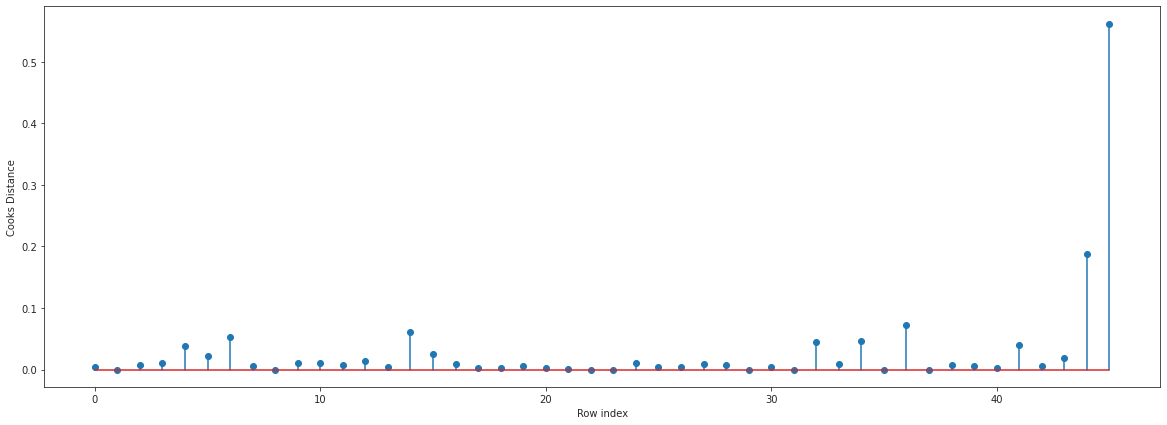

In [ ]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(Startups4)),np.round(c_V,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [ ]:
(np.argmax(c_V),np.max(c_V))

(45, 0.5620041923868039)

In [ ]:
final_ml_V= smf.ols('RandDSpend~MarketingSpend+Administration+Profit',data = Startups4).fit()

In [ ]:
(final_ml_V.rsquared,final_ml_V.aic)

(0.9475360425684383, 987.9013561983885)

In [ ]:
new_data=pd.DataFrame({'Administration':136.8,"MarketingSpend":471.8,"Profit":192.8},index=[1])

In [ ]:
final_ml_V.predict(new_data)

1   -57230.193607
dtype: float64

In [ ]:
final_ml_V.predict(Startups_new.iloc[0:5],1)

0    162235.437410
1    162992.725433
2    158004.493960
3    150670.964570
4    130235.556327
dtype: float64

In [ ]:
pred_y =final_ml_V.predict(Startups_new)

In [ ]:
pred_y

0     162235.437410
1     162992.725433
2     158004.493960
3     150670.964570
4     130235.556327
5     120959.590984
6     124397.840979
7     123536.660226
8     119978.638526
9     113945.183626
10    110277.181997
11    106632.635380
12    106726.839737
13     99504.593239
14     99423.492083
15     93632.465887
16     90365.170601
17     90554.928622
18     86727.118865
19     88907.939908
20     80400.990909
21     75987.768872
22     72321.723061
23     69123.236123
24     68645.850736
25     70802.998543
26     69380.908003
27     66863.573762
28     69994.630151
29     65037.634701
30     60747.589524
31     61214.786614
32     59240.168943
33     56052.840116
34     60599.835566
35     54221.851973
36     51504.921225
37     44289.816943
38     36072.520574
39     37284.651461
40     37285.546705
41     33963.323148
42     28113.765421
43     29039.714249
44     26413.605906
45     23570.683153
46      5617.081028
47       224.313343
48    -14322.626065
49    -31696.100413
